<a href="https://colab.research.google.com/github/SriRamK345/Deep_Learning/blob/main/DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# ! pip install tensorflow

In [7]:
import tensorflow as tf

In [8]:
print(tf.__version__)

2.17.0


In [9]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# !pip install opendatasets

In [11]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/shubh0799/churn-modelling")

In [12]:
df = pd.read_csv("/content/churn-modelling/Churn_Modelling.csv")

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dividing into independent and dependent

In [50]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [16]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [17]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


## Feature Engineering

In [18]:
geography = pd.get_dummies(X["Geography"], drop_first=True).astype(int)

In [19]:
gender= pd.get_dummies(X['Gender'], drop_first=True).astype(int)

In [20]:
X_new = X.drop(['Geography','Gender'],axis=1)

In [21]:
X_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [22]:
X = pd.concat([X_new,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature scaling is important for many machine learning algorithms, especially those that rely on distance-based metrics or gradient-based optimization. Here are the algorithms where feature scaling is typically required:

### 1. **Algorithms Based on Distance Metrics**
   - **K-Nearest Neighbors (KNN)**: Uses Euclidean or other distance metrics, so features on different scales can distort distances.
   - **Support Vector Machines (SVM)**: Distance between points and the decision boundary is crucial, so scaling helps maintain the correct distances.
   - **K-Means Clustering**: It calculates distances to assign clusters, so scaling helps improve the accuracy of the clustering.
   - **Hierarchical Clustering**: Uses distances to merge clusters, requiring scaled features for balanced grouping.

### 2. **Gradient-Based Algorithms**
   - **Logistic Regression**: Gradient descent is sensitive to the scale of features, so scaling can help the algorithm converge faster.
   - **Linear Regression** (with gradient descent): Although not always mandatory, feature scaling can speed up convergence in gradient descent-based optimization.
   - **Neural Networks**: Gradient-based optimization (e.g., backpropagation) benefits from feature scaling to ensure gradients update uniformly across features.

### 3. **Algorithms Sensitive to Variances**
   - **Principal Component Analysis (PCA)**: PCA maximizes variance along principal components, so unscaled features can bias the results.
   - **Linear Discriminant Analysis (LDA)**: Like PCA, LDA is sensitive to feature variances.
   - **Gradient Boosting Algorithms** (e.g., XGBoost, LightGBM, etc.): Although these are less sensitive than others, scaling can sometimes improve performance, especially when combined with regularization.

### 4. **Algorithms Where Feature Scaling is Not Strictly Required:**
   - **Decision Trees (e.g., Random Forests, CART)**: These models are based on rule-based splits, so they don't rely on feature scaling.
   - **Naive Bayes**: Based on probability distributions, so feature scaling doesn't affect the performance.
   
For the algorithms that need it, commonly used techniques for scaling are:
- **Standardization (Z-score scaling)**: `(X - mean) / std`
- **Min-Max scaling**: `(X - min) / (max - min)`



## Fearure Sacling

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

The reason we apply `sc.transform()` only to `X_test` but `sc.fit_transform()` to `X_train` in the context of machine learning, particularly when using feature scaling techniques like standardization or normalization, is to ensure consistency and avoid data leakage.

**Understanding the Process:**

1. **Feature Scaling:** Feature scaling is a preprocessing step that transforms the data to a common scale, often between 0 and 1 or -1 and 1. This helps to improve the performance of many machine learning algorithms.

2. **`fit_transform()` vs. `transform()`:**
   - **`fit_transform()`:** This method first calculates the necessary statistics (e.g., mean and standard deviation for standardization) from the training data `X_train`. It then applies these statistics to both `X_train` and `X_test` to transform the data to the same scale.
   - **`transform()`:** This method applies the previously calculated statistics (from `fit_transform()` on `X_train`) to the test data `X_test`, ensuring that the test data is transformed using the same parameters as the training data.

**Why `fit_transform()` on `X_train` and `transform()` on `X_test`:**

1. **Data Leakage Prevention:** Applying `fit_transform()` to both `X_train` and `X_test` would introduce data leakage. This means that the test data would be influenced by the training data during the scaling process, leading to an overestimation of the model's performance.
2. **Consistency:** Using the same scaling parameters (statistics) for both training and test data ensures consistency and prevents the model from learning information about the test data during training.
3. **Fair Evaluation:** By transforming the test data using the statistics learned from the training data, we can evaluate the model's performance on unseen data in a more realistic and fair manner.

**In summary:**

- **`fit_transform()`** calculates the scaling parameters from the training data and applies them to the training data.
- **`transform()`** applies the same scaling parameters (learned from the training data) to the test data.
- This approach prevents data leakage and ensures a fair evaluation of the model's performance.

By following this practice, you can effectively preprocess your data and obtain accurate model evaluations in your machine learning projects.


In [27]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


## Lets create ANN


In [29]:
from tensorflow.keras.models import Sequential # Enrire neural network
from tensorflow.keras.layers import Dense # To crete the Input, Hidden and outpyt Layer
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU # Activation Function
from tensorflow.keras.optimizers import Adam # Optimizer
from tensorflow.keras.layers import Dropout #

## Initilalize the ANN

In [30]:
classifier = Sequential()

# Adding input layer
classifier.add(Dense(units=11,activation='relu')) # Relu will be apllied to the next layer

# Adding hidden layer
classifier.add(Dense(units=7,activation='relu'))

# Adding another hidden layer
classifier.add(Dense(units=6,activation='relu'))

# Adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [32]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # default learning rate of ADAM is 0.01

In [33]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [34]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7591 - loss: 0.4878 - val_accuracy: 0.8205 - val_loss: 0.3988
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8360 - loss: 0.3825 - val_accuracy: 0.8531 - val_loss: 0.3717
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.3625 - val_accuracy: 0.8482 - val_loss: 0.3691
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.3386 - val_accuracy: 0.8410 - val_loss: 0.3769
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8538 - loss: 0.3475 - val_accuracy: 0.8455 - val_loss: 0.3710
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8570 - loss: 0.3461 - val_accuracy: 0.8455 - val_loss: 0.3756
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.3344 - val_accuracy: 0.8417 - val_loss: 0.3741
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8567 - loss: 0.3347 - val_accu

## Early Stoping

In [36]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [38]:
# https://keras.io/api/callbacks/early_stopping/

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [39]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=[early_stopping])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8605 - loss: 0.3159 - val_accuracy: 0.8554 - val_loss: 0.3924
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8674 - loss: 0.3129 - val_accuracy: 0.8546 - val_loss: 0.3786
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8692 - loss: 0.3147 - val_accuracy: 0.8542 - val_loss: 0.3835
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8691 - loss: 0.3053 - val_accuracy: 0.8546 - val_loss: 0.4003
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8722 - loss: 0.3056 - val_accuracy: 0.8519 - val_loss: 0.3917
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8748 - loss: 0.3055 - val_accuracy: 0.8523 - val_loss: 0.3895
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8668 - loss: 0.3110 - val_accuracy: 0.8557 - val_loss: 0.3948
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8628 - loss: 0.3176 - val_accu

In [40]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## summarize history of accuracy

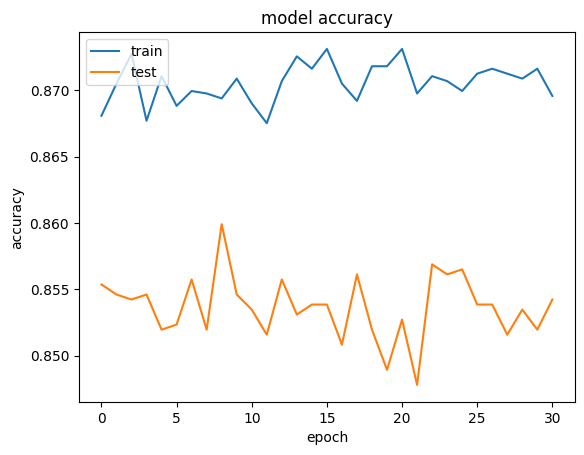

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## summarize history of loss

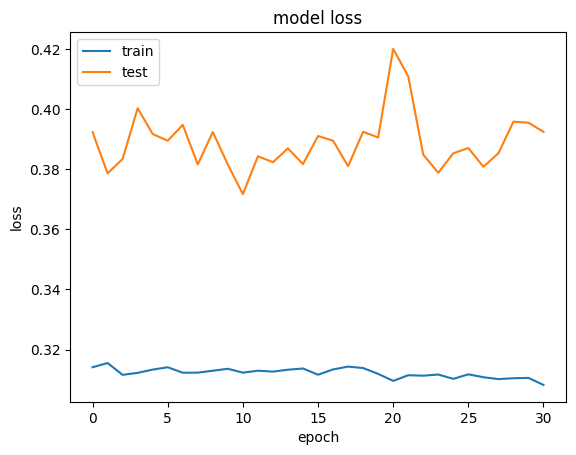

In [42]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[1527,   68],
       [ 214,  191]])

In [46]:
print(((cm[0][0]+cm[1][1])* 100) / len(y_test), '% of data was classified correctly')

85.9 % of data was classified correctly


In [47]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [48]:
score

0.859

## get the weights

In [49]:
classifier.get_weights()

[array([[ 2.9361102e-01,  8.0971755e-02, -7.9049063e-01, -1.3883985e+00,
         -1.2346927e+00, -9.1256696e-01, -1.3069372e+00, -1.3082830e+00,
          2.7392435e-01,  1.9612297e+00,  6.2430531e-01],
        [-7.1300492e+00, -3.9699121e+00, -7.0613499e+00,  1.0539223e+00,
         -1.6890947e+00,  9.3920130e-01, -4.1560006e+00,  3.8437679e+00,
         -6.8741268e-01, -6.7839541e+00, -1.5195814e+00],
        [-3.7341788e-01,  2.1470623e+00,  3.5844812e-01,  7.8299522e-01,
         -9.5934492e-01, -3.4423580e-04,  1.2261108e+00,  2.1374211e-01,
          1.1689789e-01,  5.7859188e-01,  1.6114234e+00],
        [-2.7980715e-01,  4.3020704e-01,  6.7142832e-01,  9.8410606e-01,
          3.4592736e+00,  9.3071538e-01, -2.5548594e+00, -2.6613123e+00,
         -4.3382158e+00, -1.7808717e+00, -3.1054544e+00],
        [-4.3172007e+00, -7.1370667e-01,  9.3116999e-01, -3.4092069e+00,
          2.0976617e+00,  5.3711085e+00, -1.3913120e+00, -9.6184319e-01,
         -6.6983237e+00, -2.2700551e+0

## drop out layer

In [ ]:
# tf.keras.layers.Dropout(
#     rate, noise_shape=None, seed=None, **kwargs
# )

In [ ]:
classifier = Sequential()

# Adding input layer
classifier.add(Dense(units=11,activation='relu')) # Relu will be apllied to the next layer

# Adding hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

# Adding another hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

# Adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [51]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # default learning rate of ADAM is 0.01

In [52]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=[early_stopping])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8681 - loss: 0.3094 - val_accuracy: 0.8565 - val_loss: 0.4031
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8752 - loss: 0.3015 - val_accuracy: 0.8550 - val_loss: 0.4086
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8835 - loss: 0.2794 - val_accuracy: 0.8542 - val_loss: 0.4125
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8798 - loss: 0.2919 - val_accuracy: 0.8546 - val_loss: 0.4195
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8734 - loss: 0.3006 - val_accuracy: 0.8550 - val_loss: 0.4269
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8688 - loss: 0.3042 - val_accuracy: 0.8550 - val_loss: 0.4364
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8815 - loss: 0.2900 - val_accuracy: 0.8565 - val_loss: 0.4340
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8720 - loss: 0.2993 - val_accu

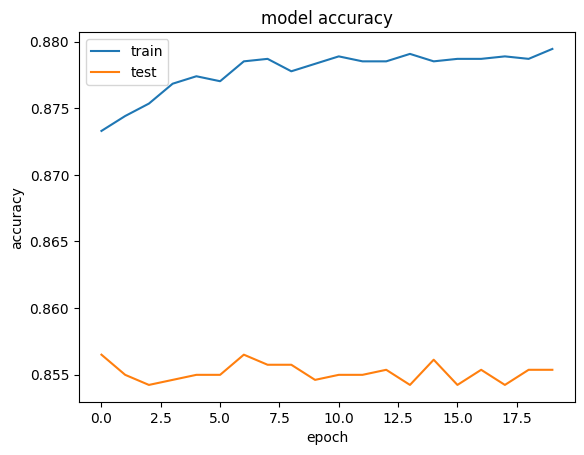

In [53]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

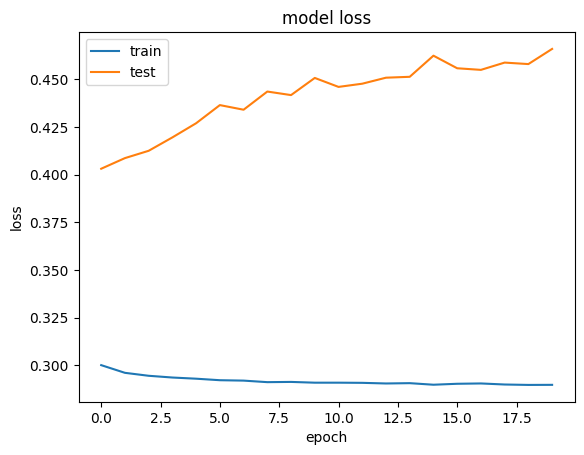

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
score=accuracy_score(y_pred,y_test)
score

0.859

## Black Box vs. White Box Models

In the realm of machine learning, models are often categorized into two primary types: black box and white box.

### Black Box Models
* **Definition:** These models are opaque, meaning their internal workings are not easily understood or interpretable.
* **Characteristics:**
  - Complex algorithms and architectures.
  - Often rely on deep learning techniques.
  - Difficult to explain how they arrive at their predictions.
* **Examples:**
  - Deep neural networks
  - Support Vector Machines (SVMs)
  - Random Forest

### White Box Models
* **Definition:** These models are transparent, allowing for a clear understanding of how they arrive at their predictions.
* **Characteristics:**
  - Simpler algorithms and architectures.
  - Easier to interpret and explain.
  - Often based on statistical or rule-based methods.
* **Examples:**
  - Linear Regression
  - Decision Trees
  - Naive Bayes

### Key Differences:

| Feature | Black Box Models | White Box Models |
|---|---|---|
| Transparency | Opaque | Transparent |
| Complexity | Complex | Simpler |
| Interpretability | Difficult | Easy |
| Use Cases | Complex tasks (e.g., image recognition, natural language processing) | Simpler tasks (e.g., linear regression, classification) |

**Choosing the Right Model:**

The choice between a black box and white box model depends on the specific requirements of the task. For example:

* If interpretability is crucial (e.g., in medical or financial applications), a white box model might be preferred.
* If accuracy is the primary concern, a black box model might be more suitable, especially for complex tasks.

In some cases, a combination of black box and white box models can be used to achieve both accuracy and interpretability. For instance, a black box model can be used for prediction, and a white box model can be used to explain the predictions.
